In [48]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(patchwork)
library(ggExtra) 
library(pals)
library(RColorBrewer)

In [54]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use Mosaic or Mosaic_shared_btw_WGS_Amp
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT) #Use Mosaic or Mosaic_shared_btw_WGS_Amp
variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.001677998 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.3923302,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [55]:
shared_variant_list<-variant_list[variant_list$sample_number_presented>0,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),] # variant_list or shared_variant_list
#shared_mosaic_filtered <- subset(shared_mosaic_filtered, Organ %in% c('CTX','BG','THAL','CB','HIP','AMG','SUB','CLO') #
#                               &!(Cell_Type %in% c('Bulk')) 
#                               & (Hemisphere %in% c('L'))
#                               )
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF","Hemisphere","Region", "CHROM.POS.REF.ALT","Cell_Type","Organ")]
melt_mtcars<-na.omit(melt_mtcars)
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Cell_Type+Organ~CHROM.POS.REF.ALT, value.var = "MAF",na.rm=T)
rownames(casted_MAF_VarBySample)<-casted_MAF_VarBySample$ID
casted_MAF_VarBySample2<-casted_MAF_VarBySample[,-1:-5]
label<-casted_MAF_VarBySample[,1:5]
UMAP<-umap(casted_MAF_VarBySample2)
df<-as.data.frame(UMAP$layout)
df<-cbind(df,label)

In [61]:
# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
p1<-ggplot(df, aes(x = V1, y = V2))+ 
geom_point(
    aes(color = Cell_Type, shape = Hemisphere),
    size = 3.5, 
    alpha = 1 # It's nice to add some transparency because there may be overlap.
  )+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position = c(0.93, 0.8))

In [62]:
# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=5)
p2<-ggplot(df, aes(x = V1, y = V2))+ 
geom_point(
    aes(color = Organ),
    size = 3.5, 
    alpha = 1 # It's nice to add some transparency because there may be overlap.
  )+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position = c(0.93, 0.8))

In [65]:
# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=5)
p3<-ggplot(df, aes(x = V1, y = V2))+ 
geom_point(
    aes(color = Region),
    size = 3.5, 
    alpha = 1 # It's nice to add some transparency because there may be overlap.
  )+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.position = c(0.93, 0.7))


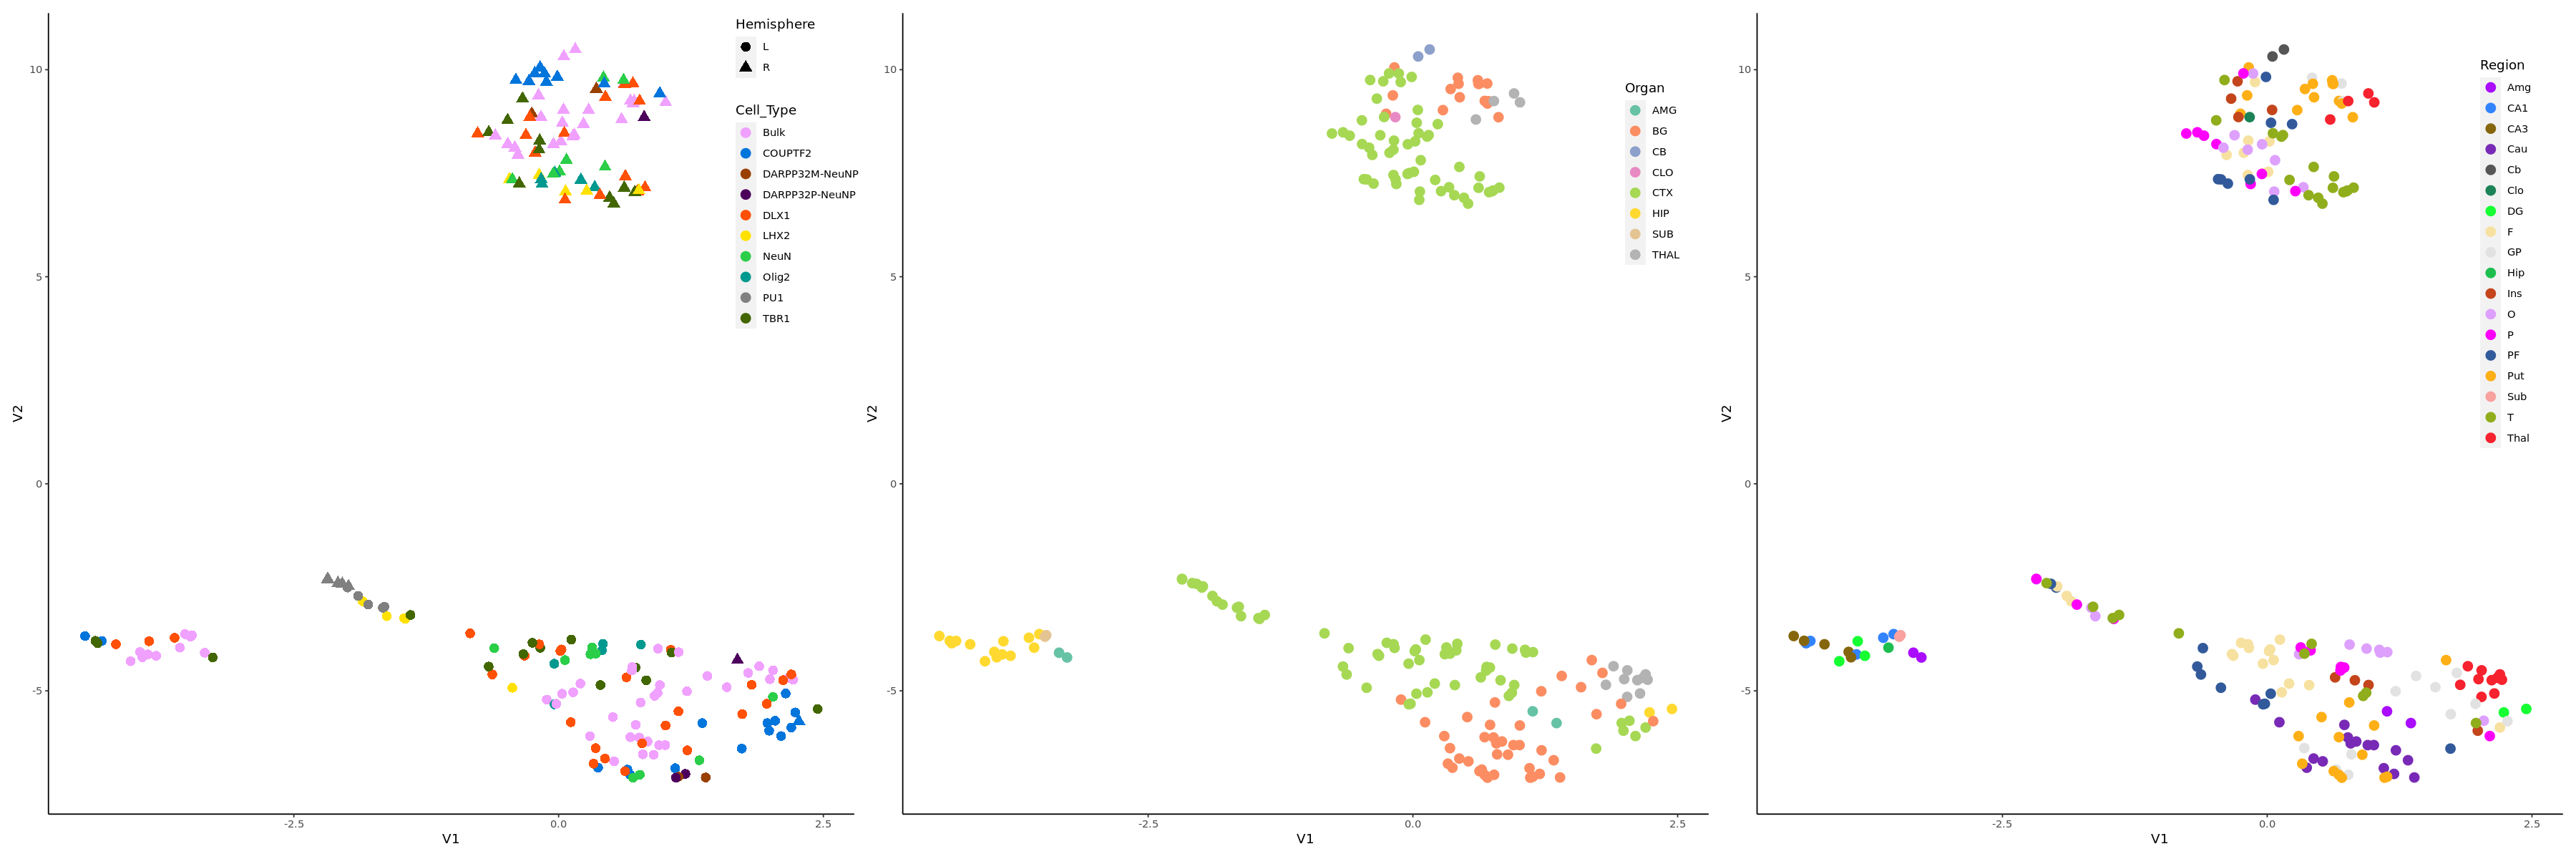

In [66]:
options(repr.plot.width=30,repr.plot.height=10)
p<-p1+scale_colour_manual(values = c('#F0A0FF','#0075DC','#993F00','#4C005C','#FF5005','#FFE100','#2BCE48','#00998F','#808080','#426600') )+
p2+scale_color_brewer(palette = "Set2")+
p3+scale_colour_manual(values = c('#AA0DFE','#3283FE','#85660D','#782AB6','#565656','#1C8356','#16FF32','#F7E1A0','#E2E2E2','#1CBE4F','#C4451C','#DEA0FD','#FE00FA',
                                 '#325A9B','#FEAF16','#F8A19F','#90AD1C','#F6222E','#1CFFCE','#2ED9FF','#B10DA1','#C075A6') )
p

In [67]:
pdf(file="7614_Brain_UMAP.pdf",height=10,width=30)
p
dev.off()

png 
  2

# lobe specific

In [35]:
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(variant_list),] # variant_list or shared_variant_list
shared_mosaic_filtered <- subset(shared_mosaic_filtered, Organ %in% c('CTX') #
                               &(Cell_Type %in% c('DLX1', 'TBR1', 'COUPTF2')) 
                               & (Hemisphere %in% c('R')) 
                               )
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF","Hemisphere","Region", "CHROM.POS.REF.ALT","Cell_Type","Organ","Punch")]
melt_mtcars<-na.omit(melt_mtcars)
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [36]:
melt_mtcars

,ID,MAF,Hemisphere,Region,CHROM.POS.REF.ALT,Cell_Type,Organ,Punch
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
271447,7614-R-5-Ins-COUPTF2,0.046219726,R,Ins,1-31691734-G-A,COUPTF2,CTX,5
271449,7614-R-5-Ins-COUPTF2,0.012059577,R,Ins,1-45675887-A-C,COUPTF2,CTX,5
271453,7614-R-5-Ins-COUPTF2,0.000000000,R,Ins,1-64512024-C-T,COUPTF2,CTX,5
271460,7614-R-5-Ins-COUPTF2,0.000000000,R,Ins,1-98426749-G-A,COUPTF2,CTX,5
271461,7614-R-5-Ins-COUPTF2,0.022916259,R,Ins,1-99581604-C-G,COUPTF2,CTX,5
271464,7614-R-5-Ins-COUPTF2,0.096830086,R,Ins,1-106934533-C-T,COUPTF2,CTX,5
271480,7614-R-5-Ins-COUPTF2,0.010414689,R,Ins,1-168467950-G-A,COUPTF2,CTX,5
271481,7614-R-5-Ins-COUPTF2,0.009320996,R,Ins,1-169329191-G-A,COUPTF2,CTX,5
271483,7614-R-5-Ins-COUPTF2,0.037446255,R,Ins,1-180856518-T-G,COUPTF2,CTX,5


In [37]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Cell_Type+Organ+Punch~CHROM.POS.REF.ALT, value.var = "MAF",na.rm=T)
rownames(casted_MAF_VarBySample)<-casted_MAF_VarBySample$ID

In [38]:
casted_MAF_VarBySample2<-casted_MAF_VarBySample[,-1:-6]
label<-casted_MAF_VarBySample[,1:6]

In [39]:
UMAP<-umap(casted_MAF_VarBySample2)
df<-as.data.frame(UMAP$layout)
df<-cbind(df,label)

ERROR: Error: umap: number of neighbors must be smaller than number of items



In [12]:
# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
p1<-ggplot(df, aes(x = V1, y = V2))+ 
geom_point(
    aes(color = Punch, shape = Cell_Type),
    size = 3.5, 
    alpha = 1 # It's nice to add some transparency because there may be overlap.
  )+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position = c(0.93, 0.3))

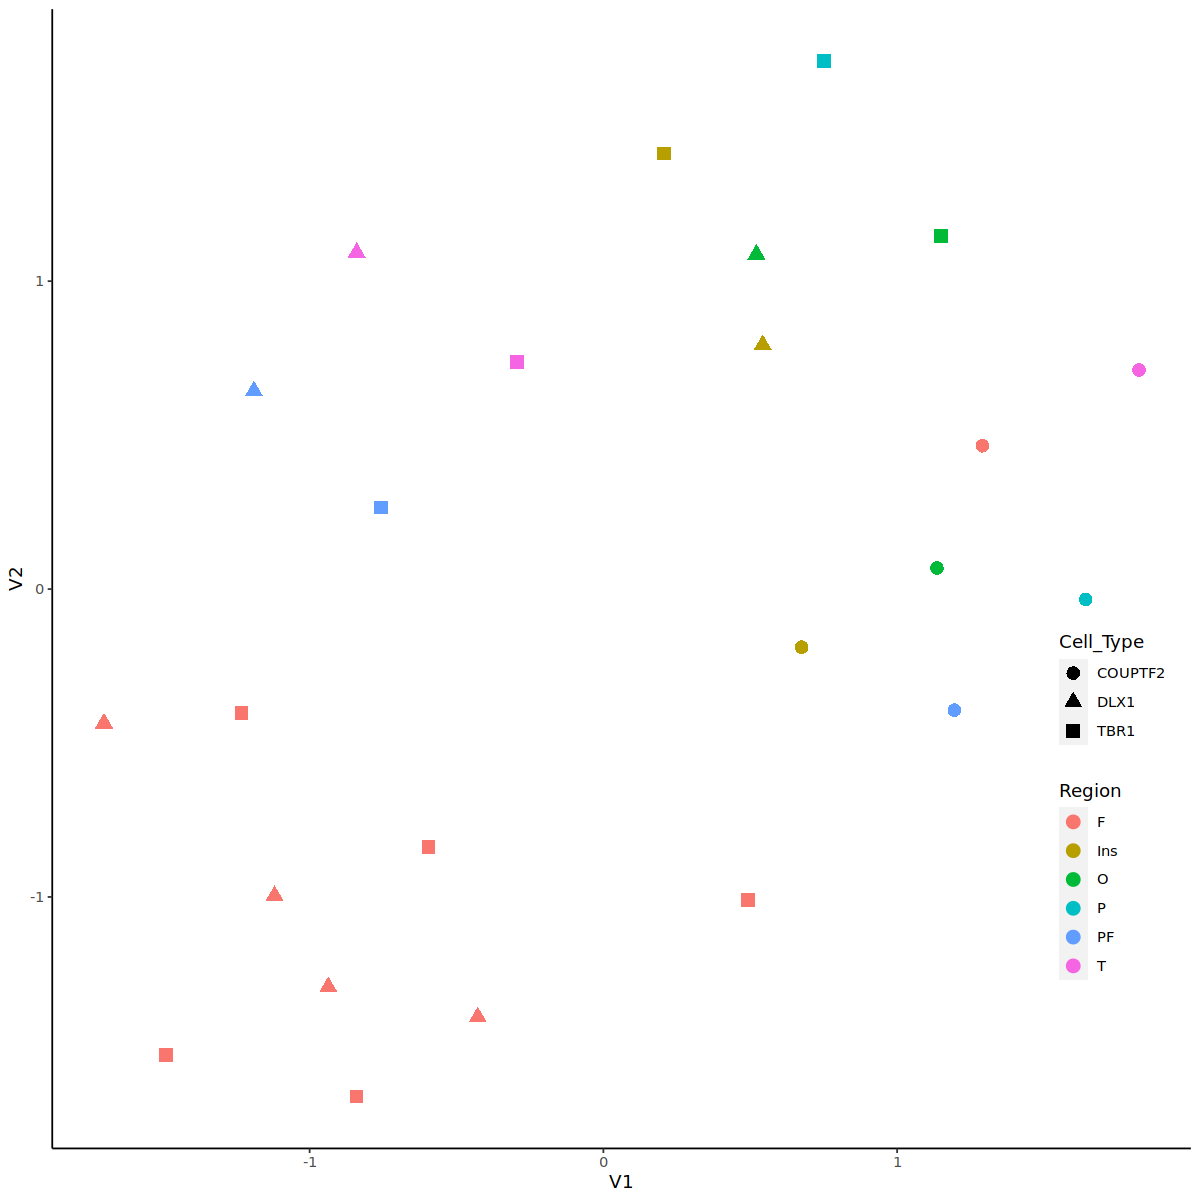

In [13]:
p1